# 신경망 학습

#### 학습
* 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻합니다. 
* 신경망이 학습할 수 있도록 해주는 지표인 손실 함수을 통해 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 목표 
* 함수의 기울기를 활용하는 경사법 소개

### 지도 학습
* 기계학습(머신러닝)에서는 데이터가 생명입니다. 
* 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는 것이 기계학습입니다. 
* 결국 기계학습은 패턴을 찾으려는 시도입니다. 

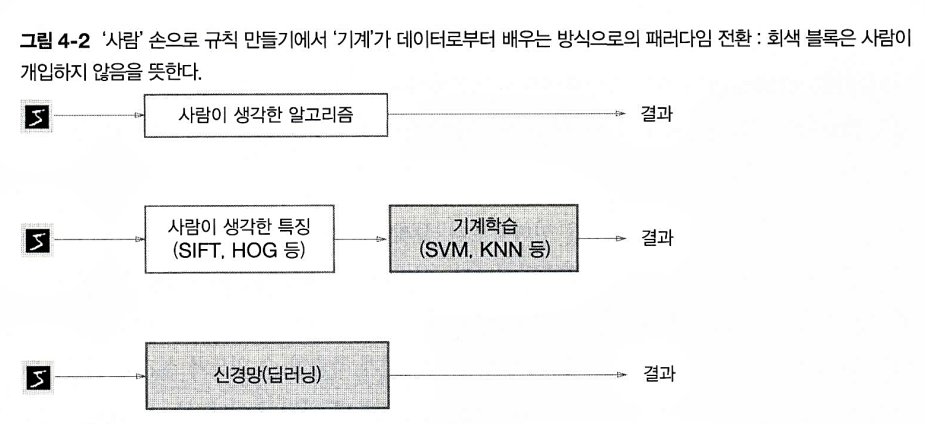

* 신경망은 이미지에 포함된 중요한 특징까지도 기계가 스스로 학습
* 딥러닝을 종단간 기계학습(end-to-end machine learning)이라고 합니다. 즉 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습할 수 있습니다. 

## 훈련 데이터와 시험 데이터
* 훈련 데이터(training data)와 시험(test data)로 나눠 학습과 실험을 수행하는 것이 일반적입니다. 
* 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾습니다. 
* 그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가하는 것입니다. 
* 데이터를 구분해서 수행하는 이유는 앞으로 새로 들어오는 데이터를 테스트 데이터라는 가정하에 모델을 개발합니다. 
* 한 데이터셋에만 지나치게 최적화된 상태를 오버피팅(overfitting)이라고 합니다. 

### 손실함수 
* 신경망 학습에서는 현재의 상태를 하나의 지표로 표현합니다. 
* 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것입니다. 

###### 엥겔 계수
* 엥겔 계수는 경제학 용어로, 총지출에서 식료품비 지출이 차지하는 비율을 계산한 값이며, 이 값이 저소득 가계에서 높고 고소득 가계에서 낮다는 통계적 법칙을 엥겔의 법칙이라 한다. 이것은 법칙의 발견자인 에른스트 엥겔의 이름을 따서 명명되었다.
* 엥겔 지수를 통한 한 나라의 경제 상황을 파악할 수 있습니다.

* 신경망에서는 엥겔 지수처럼 하나의 지표를 기준으로 최적의 매개변수 값을 탐색하는데 이 때 사용하는 지표는 손실 함수(loss function)입니다.
* 손실 함수로 일반적으로 평균 제곱 오차와 교차 엔트로피 오차를 사용합니다.

## 평균 제곱 오차
* 가장 많이 사용되는 손실 함수는 평균 제곱 오차(mean squared error)즉 MSE라고 합니다.


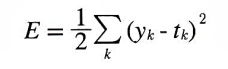

* ${Y_{k}}$는 신경망 출력(신경망이 추정한 값), ${t_{k}}$는 정답 레이블, k는 데이터의 차원 수를 나타냅니다. 

In [1]:
import numpy as np

In [2]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

* y는 소프트맥스 함수의 출력의 값 
* 정답 레이블인 t는 정답을 의미하는 위치의 원소는 1로 그 외에는 0으로 표기(one-hot-encoding)

In [3]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t) **2 )

* 2일 확률이 가장 높다고 추정(0.6)

In [4]:
mean_squared_error(y,t)

0.09750000000000003

* 7일 확률이 가장 높다고 추정 

In [5]:
mean_squared_error(np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]),t)

0.5975

* 소프트맥스의 값하고 실제 값이 차이가 많이 발생할 수록 MSE의 값은 커집니다.
* 즉 평균 제곱 오차를 기준을 손실함수로 설정하여 이 값을 작게 만드는게 목표입니다.

## 교차 엔트로피 오차
* 교차 엔트로피 오차(cross entropy error, CEE)도 자주 이용합니다.

### 정보이론(information thery)
* 정보에 대한 통신, 정량화 그리고 저장에 대하여 연구하는 학문
* 1948년에 신호처리에 대한 기본 한계를 찾기 위하여 샤논(Shannon)에 의하여 제안
* 정보 이론에서 가장 중요한 정보의 측도는 엔트로피이며 이는 확률변수에 대한 불확실한 정보의 양을 측정하는 데 사용된다.

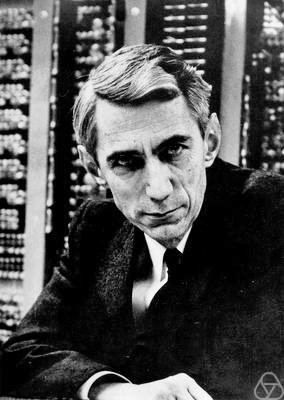

섀넌의 도깨비는 동일비중 포트폴리오의 이론적 근간입니다.
주식과 현금을 반반씩 섞어 동일비중 포트폴리오를 구성했을 경우 주가가 단순히 5,000원에서 10,000원을 오가기만 하는데도 시간이 갈수록 투자금은 기하급수적으로 늘어납니다.
최초에 1천만원을 주식 500만원, 현금 500만원으로 구성해서 주가가 변할때마다 리밸런싱을 실시했습니다.
108회째에는 투자금이 55억원으로 불어났습니다.
실제로 주가가 단기간에 5천원->1만원->5천원->1만원 하는 식으로 진동할 수는 없겠지요.
섀넌의 도깨비 시뮬레이션은 리밸런싱의 마법을 보여주기 위한 이론적인 실험입니다.

### 엔트로피의 예
* 동전 던지기의 결과를 예측하는 것은 주사위를 던져서 결과를 예측하는 것보다 낮은 불확실성, 즉 낮은 엔트로피 값을 준다

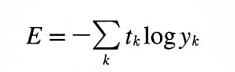

* 위의 식을 쉽게 표현하면 엔트로피라는 말은 t_k 값과 y_k값이 얼마나 서로 비슷한가를 나타낸다. 
* 두 값이 가까워지면 식의 값은 줄어들고, 같아지면 최소가 된다. 

In [11]:
import matplotlib.pyplot as plt

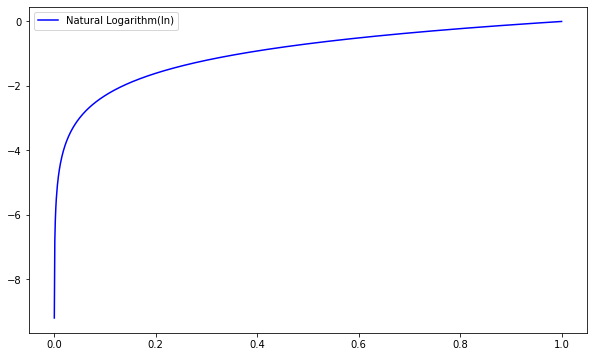

In [12]:
x = np.linspace(start=0.0001, stop=1, num=1000)

plt.figure(figsize=(10, 6))

# 자연로그(Natural Logarithm) 
plt.plot(x, np.log(x), 'b-', label='Natural Logarithm(ln)')


plt.legend()
plt.show()

* x가 1일 때는 y는 0이 되고 x가 0에 가까워질수록 y의 값은 점점 작아집니다.
* 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 됩니다.
* 반대로 정답일 때의 출력이 작아질수록 오차는 커집니다.

In [13]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [14]:
cross_entropy_error(y,t)

0.510825457099338

In [15]:
cross_entropy_error(np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]),t)

2.302584092994546

* 첫 번째 예는 정답일 때의 출력이 0.6인 경우로, 이때의 교차 엔트로피 오차는 약 0.51
* 그 다음은 정답일 때의 출력이 2.3
* 오차 값이 더 작은 첫번 째 추정이 정답일 가능성이 높다고 판단하는 것으로 MSE의 판단하고 일치

### 미니배치 학습
* 기계학습 문제는 훈련 데이터를 사용해 학습합니다. 더 구체적으로 말하면 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아냅니다.
* 이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 합니다. 
* 즉 훈련 데이터가 100개 있으면 그로부터 계산한 100개의 손실 함수의 값들의 합을 지표로 삼는 것입니다.

* 이제는 모든 훈련 데이터에 대한 손실 함수의 합을 구하는 방법을 생각해보겠습니다.

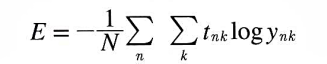

* 위의 Cross Entropy 함수를 N개의 데이터로 확장한 수식입니다.
* 마지막으로 N으로 나누어 평균 손실 함수를 구하는 것입니다. 

* 데이터의 수 n이 커지면 크로스엔트로피의 계산도 너무 커져서 현실의 벽에 부딪치게 됩니다.
* 이런 경우 데이터 일부를 추려 전체의 근사치로 이용하는데 이때 이 일부를 미니배치라고 합니다. 
* 이러한 학습 방법을 미니배치 학습이라고 합니다.

* 훈련 데이터에서 무작위로 10장만 빼기 위해서 np.random.choice 함수를 사용합니다.

In [16]:
np.random.choice(60000,10)

array([10906, 52610, 17741, 33570, 56979,  1005, 39913, 32324, 53049,
        5321])

### 미니배치 버전의 교차 엔트로피 오차 구하기

In [17]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

* y가 1차원이라면 reshape로 형상을 변경합니다. 

In [18]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum( np.log(y[np.arange(batch_size), t])) / batch_size

In [19]:
y = np.random.randn(100,10)

In [20]:
t = np.zeros((100,1))

In [21]:
t = np.random.random(100).reshape(100,1) * 10

In [22]:
t = np.random.randn(100)

In [23]:
y

array([[ 1.11810196e+00, -8.51580650e-01,  1.01464782e+00,
         8.54055214e-01, -8.30990414e-01,  2.45665520e-02,
         3.51134385e-01,  2.71227488e+00,  1.28252411e+00,
         1.39733495e+00],
       [-8.11305622e-01,  5.12620892e-02, -5.41361987e-01,
        -1.79655685e+00,  5.00425475e-01,  2.59353711e-02,
         1.79412314e-01, -3.96765202e-01, -1.38418160e+00,
         3.26707412e-01],
       [ 2.70231641e+00,  1.21424788e+00, -9.56091696e-01,
         4.85562039e-01, -8.95860650e-01,  6.15189406e-01,
         1.16304670e+00, -3.25264393e-01,  1.34883467e+00,
        -4.12376023e-01],
       [-7.22815560e-01, -3.29326090e-01,  3.74537672e-01,
        -3.83384290e-01, -9.29149710e-01,  2.47208856e-01,
         1.59015259e+00,  9.56336565e-01,  8.77292313e-01,
         2.02885451e-01],
       [ 1.12841510e+00, -6.29532615e-01, -4.24591182e-01,
        -8.61691865e-02,  1.30564428e-01, -1.15358784e+00,
        -1.62989395e-01,  1.37940365e+00,  3.30716279e-01,
        -1.

In [24]:
y[np.arange(100), t.round().astype(np.int32) ]

array([ 1.28252411, -1.3841816 ,  2.70231641,  0.37453767,  1.1284151 ,
       -1.220278  ,  0.3139724 ,  1.95355127, -0.58886096, -0.61549378,
       -0.16554035, -0.09164062, -0.32401268, -1.95401207,  0.85907874,
       -1.99200328,  0.66115061, -0.24212153,  2.19767118, -0.92790126,
        1.131839  ,  0.77375681,  0.40310061, -0.00585594,  0.73600669,
        0.92000376, -0.91282898, -0.97065061, -0.54800331, -0.148825  ,
       -0.43471202, -1.73738866, -0.53571784, -0.27085086, -0.36984517,
       -0.20236022,  0.53339865, -0.00610835, -0.49175155, -0.32808175,
        0.58622471, -2.21724895,  0.08402911,  0.21140524, -0.9259952 ,
        2.72712424, -0.55256334, -1.19874233,  1.72476952, -1.60863615,
        0.83437867,  0.57067371,  1.98476117, -1.89280354, -2.07063137,
        0.1417384 ,  0.59461868, -1.18943573,  0.49373245,  0.28783934,
        1.18436185,  0.59056251, -0.44118414,  1.23144409,  0.56918931,
        1.06937325,  0.69205813,  1.12925169,  1.26720055, -0.48

### 왜 손실 함수를 설정하는가? 

* 신경망 학습에서 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾습니다.
* 이때 매개변수의 미분(기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복합니다.

* 손실 함수의 미분이란 가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나라는 의미입니다.
* 만약 이 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있습니다. 
* 미분 값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 달라지지 않습니다. 
    - 그래서 그 가중치 매개변수의 갱신은 거기서 멈춥니다.

* 정확도는 매개변수의 작은 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화합니다. 
* 신경망 학습에서 중요한 성질로, 기울기가 0이 되지 않은 덕분에 신경망이 올바르게 학습 할 수 있습니다.

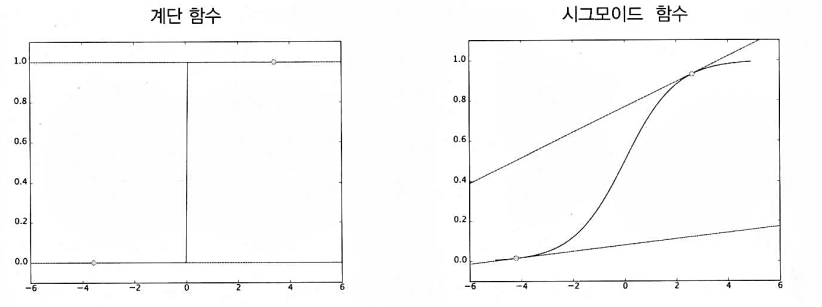

### 미분

* x의 값을 어떤 값 a에 최대한 가깝게 만들 때, 함수 f(x)의 값도 어떤 값 ${\alpha}$에 최대한 가까워 지는 모양을 수렴이라 합니다. 

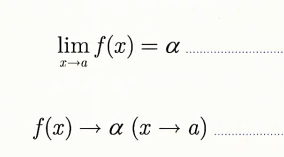

* 이 수식의 ${\alpha}$는 함수 f(x)에서 x->a일 때의 극한값이라고 합니다. 

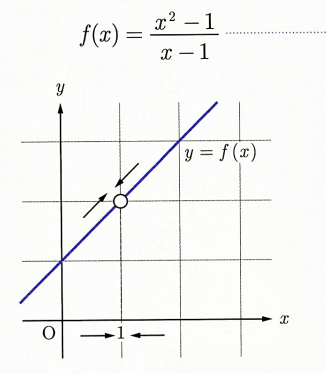

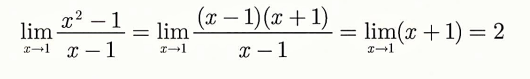

* 위 예제는 x가 1에 한없이 가까워질 때 극한값이 2인 예제입니다.

### 문제 

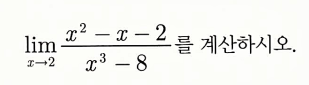

### 두 점을 지나는 직선의 방정식

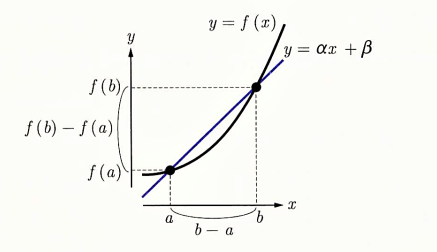

* ${f(a) = \alpha a+ \beta}$
* ${f(b) = \alpha b+ \beta}$
* ${f(b) - f(a) = \alpha (b-a)}$
## ${\alpha = \frac{f(b) - f(a)}{b-a} }$ 

* ${\beta = f(a) - \alpha a}$
## = ${f(a) - \frac{f(b) - f(a)}{b-a}}a$

* b - a = 0이 되기 때문에 값을 정의하지 못합니다. 그래서 이때 극한의 개념을 사용합니다. 
* 결국 어떤 함수의 특정한 지점에서의 기울기를 구하는 것을 미분한다라고 합니다. 

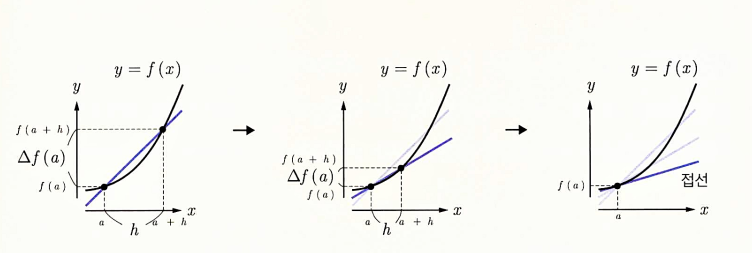

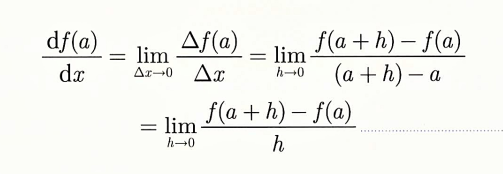

* 이때의 직선을 접선이라고 하고, 평균변화율의 극한값인 ${\alpha}$는 x = a일 때의 미분계수라고 합니다.

* 미분은 한순간의 변화량을 표시한 것입니다. 

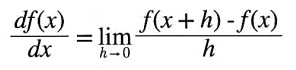

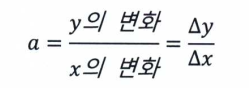

* x의 작은 변화가 함수f(x)를 얼마나 변화시키느냐를 의미합니다. 이때 시간의 작은 변화, 즉 시간을 뜻하는 h를 한없이 0에 가깝게 한다는 의미로 ${lim_{h->0}}$

In [25]:
import numpy as np

In [26]:
import matplotlib.pyplot as plt

In [27]:
x = np.linspace(-3, 3, 100)
y = (lambda x : x ** 2)(x)
y1 = 2 * x

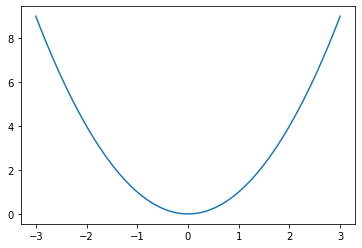

In [28]:
plt.plot(x, y)
plt.show()

In [29]:
def spines():
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))
    
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

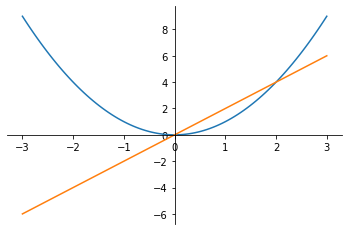

In [30]:
plt.plot(x, y)
plt.plot(x, (lambda x : 2 *x)(x))
spines()
plt.show()

## 문제 
#### 미분의 정의에 따라 ${f(x) = x^2}$을 미분하시오
#### ${y = x^2}$ 위의 점 (3, 9)에 대한 접선의 방정식을 구하시오

In [31]:
def test(f, x):
    # f는 함수
    return f(5)+x

In [32]:
def tmp(x):
    return x ** 2

In [33]:
test(tmp, 10)

35

In [34]:
def a(x):
    print (x)
    def b(x):
        print (x+2)
    return b

In [35]:
c = a(10)

10


In [36]:
c(10)

12


In [37]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x) ) / h

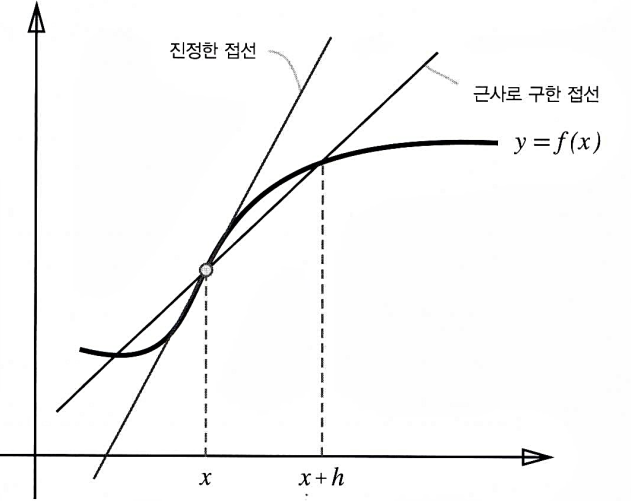

* x를 중심으로 그 전후의 차분을 계산하는 의미에서 중심 차분 혹은 중앙 차분이라고 합니다.

In [38]:
def numerical_diff(f, x):
    h = 1e-4
    return ( f(x+h) - f(x-h)) / (2*h)

* 예제 

In [39]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

In [40]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

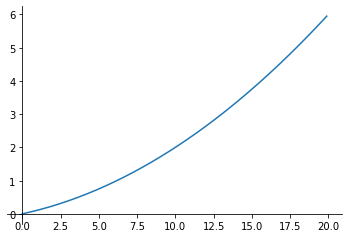

In [41]:
plt.plot(x, y)
spines()
plt.show()

In [42]:
numerical_diff(function_1, 5)

0.1999999999990898

In [43]:
numerical_diff(function_1, 5)

0.1999999999990898

In [44]:
numerical_diff(function_1, 10)

0.2999999999986347

## 편미분

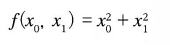

In [45]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

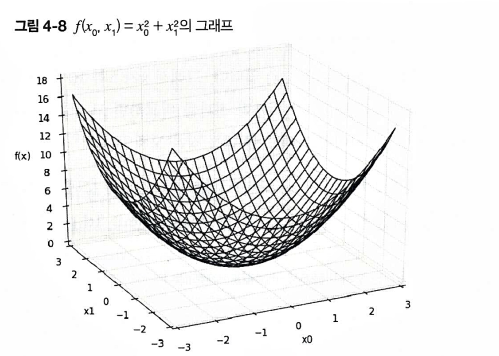

* 변수가 2개가 존재하며, 어느 변수에 대한 미분이냐 즉 ${x_0}$와 ${x_1}$ 중 어느 변수에 대한 미분이냐 구별해야합니다.
* 이와 같이 변수가 여럿인 함수에 대한 미분을 편미분이라고 합니다. 

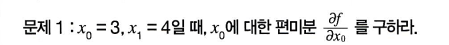

In [46]:
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

In [47]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

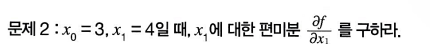

In [48]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1*x1

In [49]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 문제 : 다음을 미분하시오
### ${f(x) = ax^2 + bx + c}$
### ${f(x,y)} = 3x^2 + 5xy +3y^3$

* 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구합니다. 
* 단 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정합니다. 

## 기울기

* 위의 예제에서는 ${x_0}$, ${x_1}$의 편미분을 따로 계산했지만, 동시에 계산하고 싶다면 어떻게 해야할까?

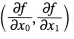

* 위의 수식처럼 모든 변수의 편미분을 벡터로 정리한 것을 기울기(gradient)라고 합니다. 

In [50]:
np.arange(12).reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
np.zeros_like(np.arange(12).reshape(3,4))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [52]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        
    return grad

In [53]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [54]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [55]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

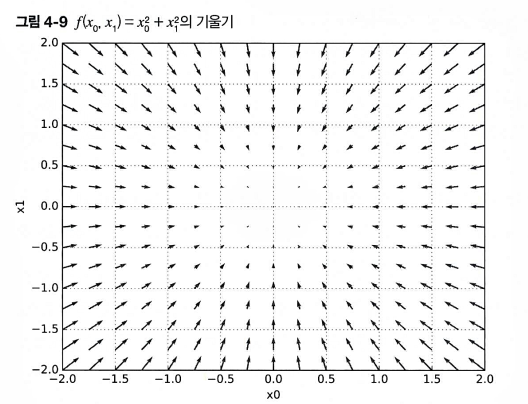

* 기울기 그림처럼 방향을 가진 벡터(화살표)로 그려집니다. 이 그림을 보면 기울기는 함수의 가장 낮은 장소를 가리키는 것같습니다.
* 마치 나침반처럼 화살표들은 한 점을 향하고 있습니다. 
* 가장 낮은 곳에서 멀어질수록 화살표의 크기가 커짐을 알 수 있습니다.
### **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 줄이는 방향입니다.**

## 경사 하강법

* 기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾습니다.
* 신경망 역시 최적의 매개변수(가중치와 편향)를 학습 시에 찾아야 합니다. 
* 여기서 최적이란 손실 함수가 최솟값이 될 때의 매개변수입니다. 
* 일반적인 문제의 손실 함수는 매우 복잡하고 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지를 알아내기 만만치 않습니다.
* 이런 상황에서 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법입니다.

* 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기라는 것입니다. 그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지,
* 즉 그쪽이 정말로 나아갈 방향인지는 보장할 수 없습니다. 
* 실제로 복잡한 함수에는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분입니다. 

* 기울어진 방향이 꼭 최솟값이 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있습니다.
* 즉 기울기 정보는 나아갈 방향의 단서를 제공합니다.

### 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동합니다. 
### 그 다음 이동한 곳에서 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가는 일은 반복합니다. 
## 이렇게 해서 함수의 값을 점차 줄이는 것이 경사법(gradient method)입니다.

##### 기계학습의 최적화 문제에서 흔히 쓰이는 방법입니다. 특히 신경망 학습에는 경사법을 많이 사용합니다.

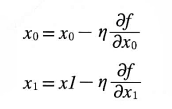

* 위의 수식은 경신하는 양을 나타냅니다. 이를 신경망 학습에서는 **학습률(learning rate)** 이라고 합니다.

* 즉 매개변수의 값을 얼마나 갱신하느냐를 정하는 것이 학습률입니다.

In [56]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


* step_num은 경사법에 따른 반복 횟수를 뜻합니다. 

In [57]:
def function_2(x):
    return x[0]**2 + x[1]**2

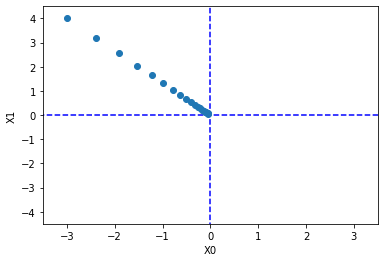

In [76]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

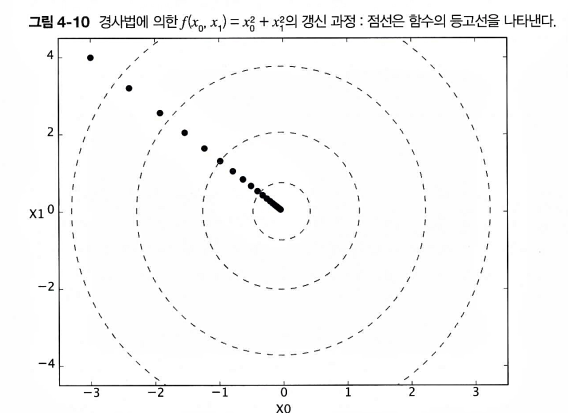

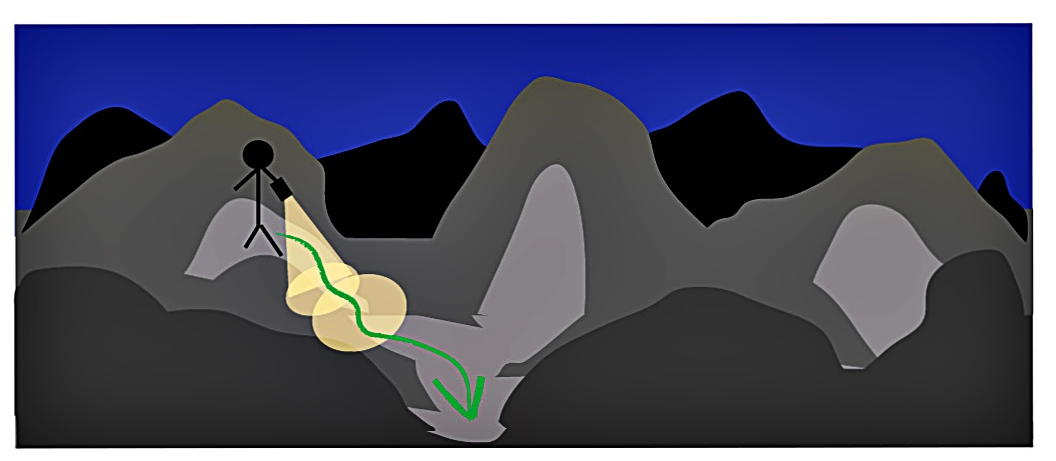

## 학습률의 중요성
* 학습률은 너무 크거나 작을 때 문제점

In [59]:
np.set_printoptions(precision=3)

In [60]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [61]:
# 경사법으로 f(x0, x1) = x0² + x1²의 최솟값을 구해라
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1)
print(x)  # [ -6.11110793e-10   8.14814391e-10]

# 학습률이 너무 큼
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=10.0)
print(x)  # [ -2.58983747e+13  -1.29524862e+12] 발산함

# 학습률이 너무 작음
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=1e-10)
print(x)  # [-2.99999994  3.99999992] 거의 변화 없음


[-0.000000 0.000000]
[-25898374737328.363281 -1295248616896.539795]
[-3.000000 4.000000]


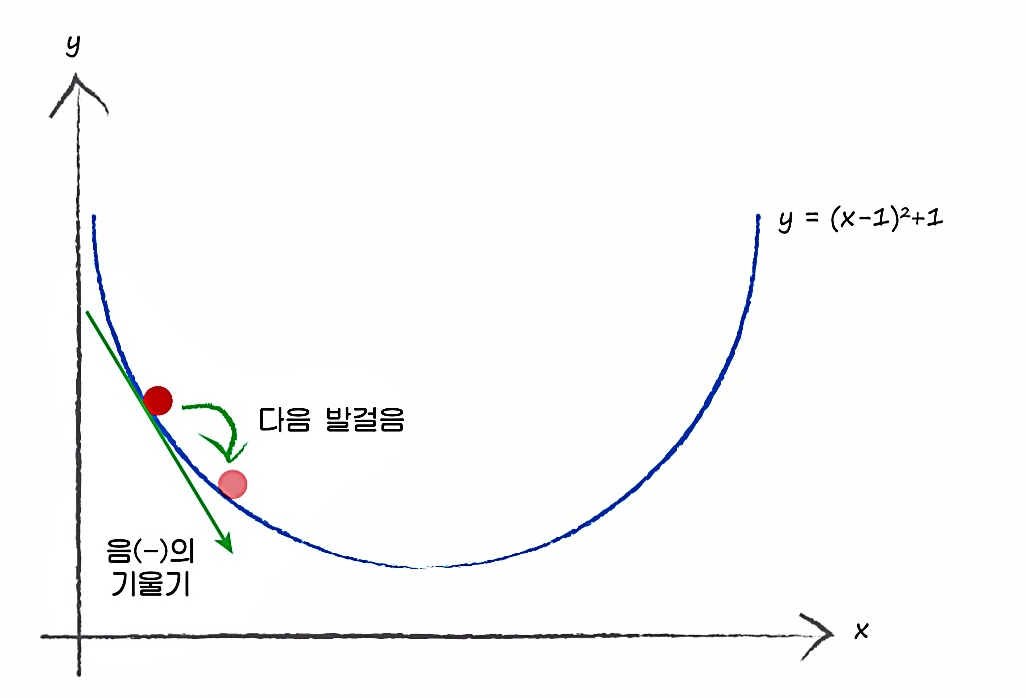

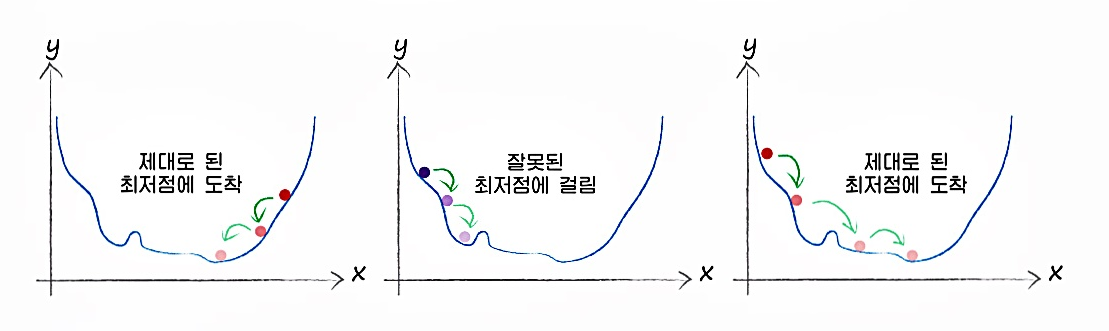

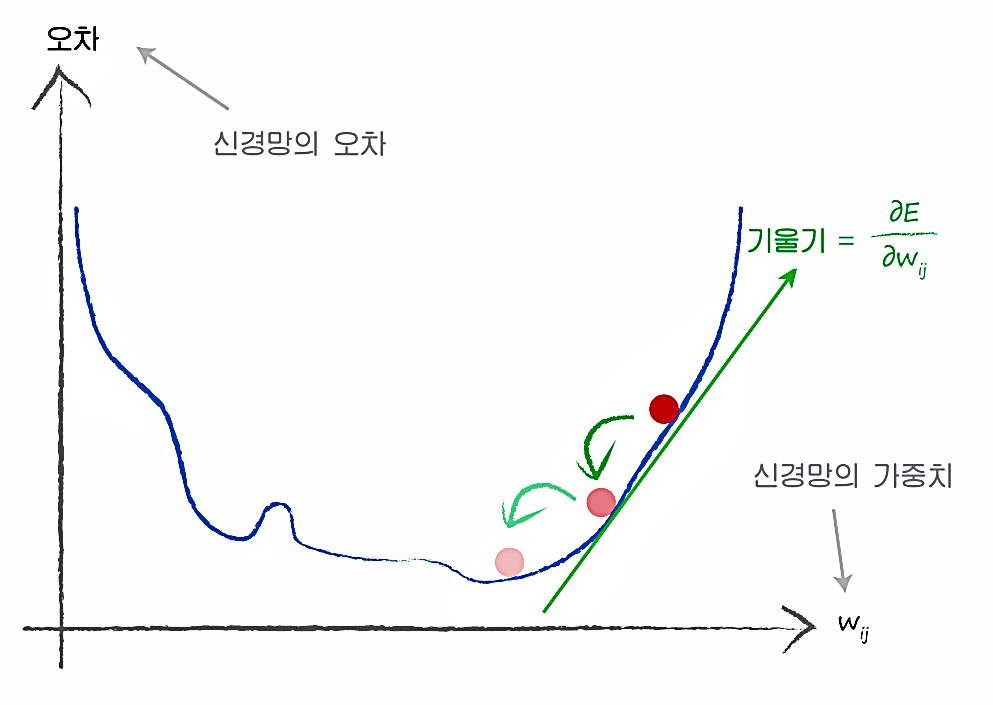

* 학습률 같은 매개변수를 하이퍼파라미터라고 합니다.
* 가중치와 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수입니다. 
* 가중치는 훈련 데이터와 학습 알고리즘이 자동으로 생성하기 하는 반면, 학습률은 사람이 설정해야 합니다.

In [62]:
import matplotlib.pyplot as plt

In [63]:
import  numpy as np

In [64]:
def f2(x):
    return x ** 3 - 3 * x ** 2 + 4

In [65]:
def f3(x):
    return 3 * x ** 2 - 6 * x

In [66]:
def f4(x):
    return 6 * x - 6

In [67]:
x = np.linspace(-15,15,100)

In [68]:
y = f2(x)

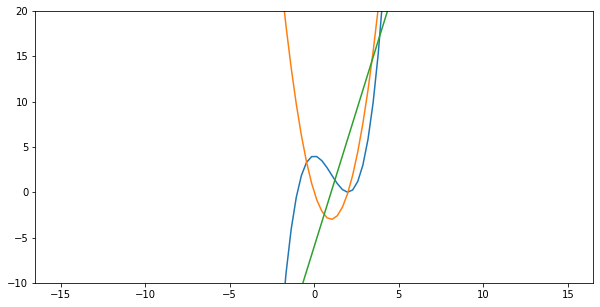

In [69]:
fig = plt.figure(figsize=(10,5))
plt.plot(x,f2(x))
plt.plot(x,f3(x))
plt.plot(x,f4(x))
plt.ylim(-10,20)
plt.show()